In [1]:
%matplotlib inline

Building spatial neighbors graph
================================

This example shows how to compute a spatial neighbors graph.

Spatial graph is a graph of spatial neighbors with observations as nodes
and neighbor-hood relations between observations as edges. We use
spatial coordinates of spots/cells to identify neighbors among them.
Different approach of defining a neighborhood relation among
observations are used for different types of spatial datasets.


In [3]:
import numpy as np

import squidpy as sq

First, we show how to compute the spatial neighbors graph for a Visium
dataset.


In [4]:
adata = sq.datasets.visium_fluo_adata()
adata

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We use {func}`squidpy.gr.spatial_neighbors` for this. The function expects
`coord_type = 'visium'` by default. We set this parameter here
explicitly for clarity. `n_rings` should be used only for Visium
datasets. It specifies for each spot how many hexagonal rings of spots
around will be considered neighbors.


In [5]:
sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=6)

The function builds a spatial graph and saves its adjacency matrix to
`adata.obsp['spatial_connectivities']` and weighted adjacency matrix to
`adata.obsp['spatial_distances']` by default. Note that it can also
build a a graph from a square grid, just set `n_neighs = 4`.


In [6]:
adata.obsp["spatial_connectivities"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

The weights of the weighted adjacency matrix are ordinal numbers of
hexagonal rings in the case of `coord_type = 'visium'`.


In [7]:
adata.obsp["spatial_distances"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

We can visualize the neighbors of a point to better visualize what
[n\_rings]{.title-ref} mean:


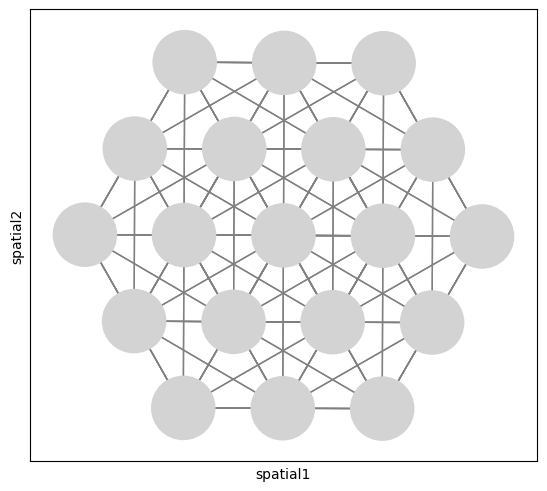

In [8]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    connectivity_key="spatial_connectivities",
    img=False,
    na_color="lightgrey",
)

Next, we show how to compute the spatial neighbors graph for a non-grid
dataset.


In [9]:
adata = sq.datasets.imc()
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

We use the same function for this with `coord_type = 'generic'`.
`n_neighs` and `radius` can be used for non-Visium datasets. `n_neighs`
specifies a fixed number of the closest spots for each spot as
neighbors. Alternatively, `delaunay = True` can be used, for a Delaunay
triangulation graph.


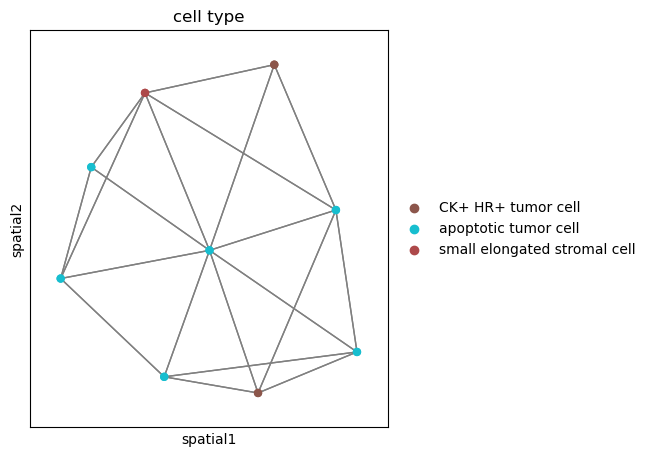

In [10]:
sq.gr.spatial_neighbors(adata, n_neighs=10, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=100,
)

We use the same function for this with `coord_type = 'generic'` and
`delaunay = True`. You can appreciate that the neighbor graph is
slightly different than before.


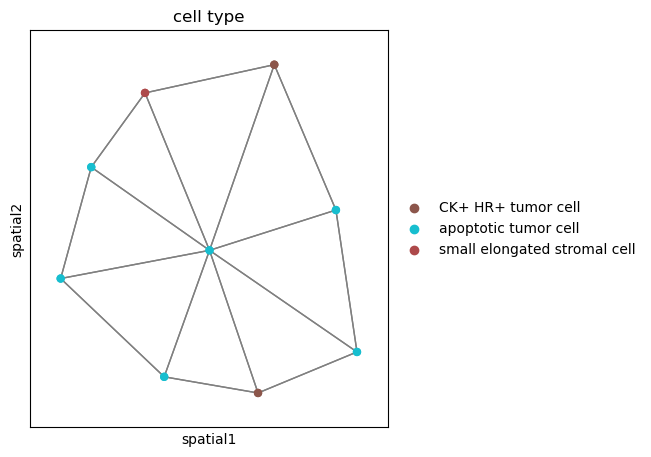

In [11]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=100,
)

In order to get all spots within a specified radius (in units of the
spatial coordinates) from each spot as neighbors, the parameter `radius`
should be used.


In [12]:
sq.gr.spatial_neighbors(adata, radius=0.3, coord_type="generic")

adata.obsp["spatial_connectivities"]
adata.obsp["spatial_distances"]

<4668x4668 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>